In [2]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/" # a download-only linked
HOUSING_PATH = os.path.join("datasets","housing") # Defines a path in the folder where I'm currently working in
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz" # defining the saving and extraction path

In [3]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH): # defining function to extract and save housing data
    os.makedirs(housing_path, exist_ok=True) # # Creates a path in the folder where I'm currently working in, based on housing_path defintion
    tgz_path = os.path.join(housing_path,"housing.tgz") # Defines a path for the tgz file
    urllib.request.urlretrieve(housing_url,tgz_path) # Defines the path from where to where the following actions will be executed
    housing_tgz = tarfile.open(tgz_path) # Opens the tarfile in githubusercontent
    housing_tgz.extractall(path=housing_path) # Extracts the content of tgz to our housing_path
    housing_tgz.close() # closing the tarfile


In [4]:
fetch_housing_data() # fetches our housing data

In [5]:
import pandas as pd # Delivers a panda-DataFrame-Object with all data
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [6]:
housing = load_housing_data()

In [7]:
housing.head(7)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
housing["ocean_proximity"].value_counts(normalize=False,ascending=True)

ISLAND           5
NEAR BAY      2290
NEAR OCEAN    2658
INLAND        6551
<1H OCEAN     9136
Name: ocean_proximity, dtype: int64

In [11]:
housing["median_income"].value_counts(bins=5)

(0.484, 3.4]    9683
(3.4, 6.3]      9088
(6.3, 9.2]      1488
(9.2, 12.1]      271
(12.1, 15.0]     110
Name: median_income, dtype: int64

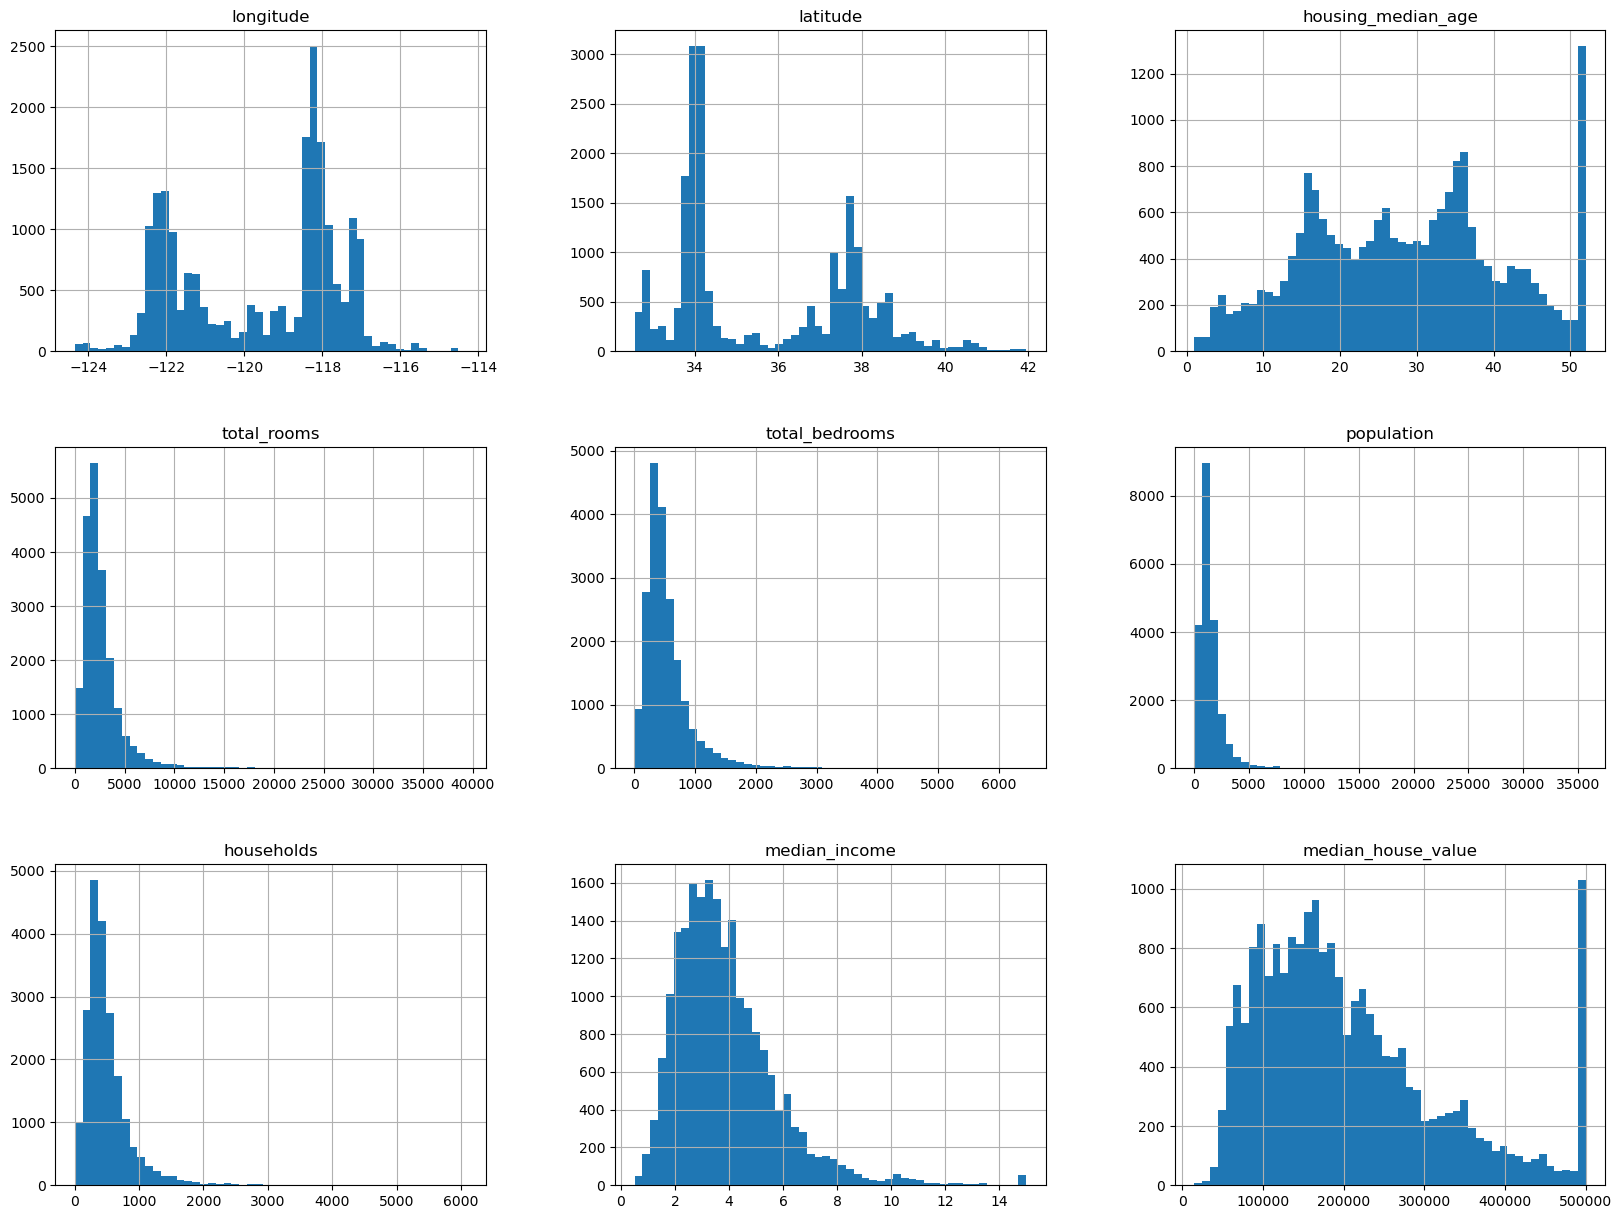

In [12]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15)) # creating a histogram for every numerical feature, each devided into 50 bins
plt.show()

In [13]:
housing_wID = housing.reset_index()
housing_wID["id"] = housing["latitude"]*1000 + housing["latitude"] # Intented to create unique IDs for datasets, but doesn't work bruh
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [14]:
housing_wID.head(10)

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,37917.88
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,37897.86
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,37887.85
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,37887.85
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,37887.85
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,37887.85
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,37877.84
7,7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,37877.84
8,8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,37877.84
9,9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,37877.84


In [15]:
# Creating "regular" train-test-split
from sklearn.model_selection import train_test_split
TEST_SIZE = 0.2 
train_set, test_set = train_test_split(housing,test_size=TEST_SIZE,random_state=42)

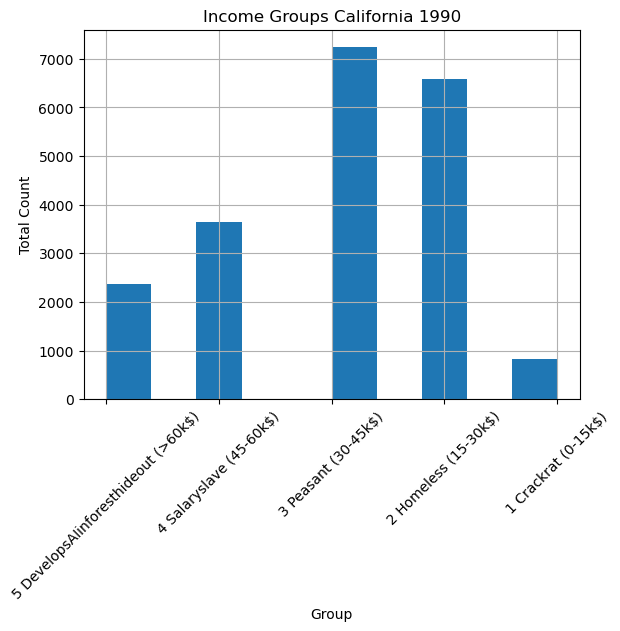

In [16]:
# Stratify our median incomes into income categories
import numpy as np
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0.,1.5,3.0,4.5,6., np.inf], labels=["1 Crackrat (0-15k$)","2 Homeless (15-30k$)","3 Peasant (30-45k$)","4 Salaryslave (45-60k$)","5 DevelopsAIinforesthideout (>60k$)"])
housing["income_cat"].hist()
plt.title("Income Groups California 1990")
plt.xlabel("Group")
plt.ylabel("Total Count")
plt.xticks(rotation=45)
plt.show()

In [17]:
# Based on our income categories, we apply a SSS to avoid bias in our small test set
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing,housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

strat_test_set["income_cat"].value_counts()/ len(strat_test_set)

3 Peasant (30-45k$)                    0.350533
2 Homeless (15-30k$)                   0.318798
4 Salaryslave (45-60k$)                0.176357
5 DevelopsAIinforesthideout (>60k$)    0.114341
1 Crackrat (0-15k$)                    0.039971
Name: income_cat, dtype: float64

In [18]:
for train_index, test_index in split.split(housing,housing["income_cat"]):
    print(train_index.shape)
    print(test_index.shape)

(16512,)
(4128,)


In [19]:
TEST_SIZE = 0.2 
train_set, test_set = train_test_split(housing,test_size=TEST_SIZE,random_state=42)

In [20]:
# The proportions of the income_cat groups are defined as the following fractions
total_value_counts = housing["income_cat"].value_counts() / len(housing)
normal_test_value_counts = test_set["income_cat"].value_counts()/ len(test_set)
strat_test_value_counts = strat_test_set["income_cat"].value_counts()/ len(strat_test_set)
# The absolute value of their respective errors are described as 
abs_n_err = (abs((normal_test_value_counts.values)-(total_value_counts.values)))
abs_s_err = (abs((strat_test_value_counts.values)-(total_value_counts.values)))

# Convert the Series object to a DataFrame with appropriate column names
df_comparison = pd.DataFrame({
    "Income Category": total_value_counts.index,
    "Normal Proportion": total_value_counts.values,
    "Test Proportion": normal_test_value_counts.values,
    "Test Proportion Error": abs_n_err,
    "Strat Test Proportion": strat_test_value_counts.values,
    "Strat Test Proportion Error": abs_s_err
})
df_comparison

,Income Category,Normal Proportion,Test Proportion,Test Proportion Error,Strat Test Proportion,Strat Test Proportion Error
0,3 Peasant (30-45k$),0.350581,0.358527,0.007946,0.350533,0.000048
1,2 Homeless (15-30k$),0.318847,0.324370,0.005523,0.318798,0.000048
2,4 Salaryslave (45-60k$),0.176308,0.167393,0.008915,0.176357,0.000048
3,5 DevelopsAIinforesthideout (>60k$),0.114438,0.109496,0.004942,0.114341,0.000097
4,1 Crackrat (0-15k$),0.039826,0.040213,0.000388,0.039971,0.000145


In [21]:
# After using the stratisfyer category, we shall delete it from our train and test sets to avoid influence on our further procedure
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True)

In [22]:
# Check results
strat_train_set.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN
1481,-122.04,37.96,28.0,1207.0,252.0,724.0,252.0,3.6964,165700.0,NEAR BAY
18125,-122.03,37.33,23.0,4221.0,671.0,1782.0,641.0,7.4863,412300.0,<1H OCEAN
5830,-118.31,34.20,36.0,1692.0,263.0,778.0,278.0,5.0865,349600.0,<1H OCEAN
17989,-121.95,37.27,17.0,1330.0,271.0,408.0,258.0,1.7171,181300.0,<1H OCEAN
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999,500001.0,<1H OCEAN


In [23]:
housing_buc = strat_train_set.copy()

In [24]:
len(housing_buc)

16512

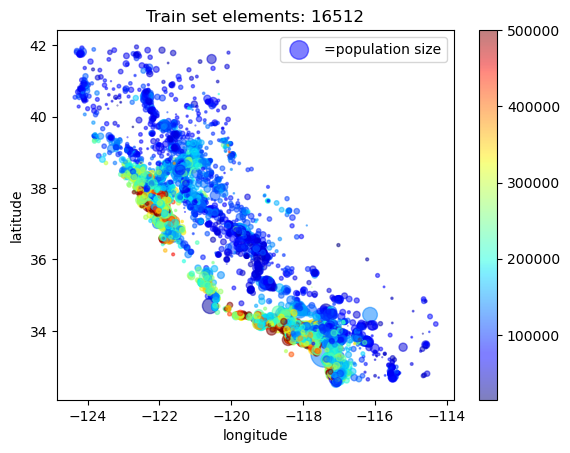

In [25]:
housing_buc.plot(kind="scatter", x="longitude",y="latitude",alpha=0.5,
                 s=housing_buc["population"]/100,c=housing_buc["median_house_value"],
                 cmap=plt.get_cmap("jet"),
                 label="=population size",
                 colorbar=True
                 ) 
# Plotting the districts with alpha=0.1 (transparency) 
# s is the radius of each circle, representing the total population of the district
# c determines the color of each circle
# cmap defines the red to blue scheme
# colorbar displays the color-value correlation
train_set_elements = str(len(housing_buc))
plt.title(label=f"Train set elements: {train_set_elements}")
plt.show()

In [26]:
# Searching for useful correlation in the data
corr_matrix = housing_buc.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

C:\Users\MaxB2\AppData\Local\Temp\ipykernel_15976\4032564491.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing_buc.corr()


median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [27]:
type(housing_buc)

pandas.core.frame.DataFrame

<Axes: >

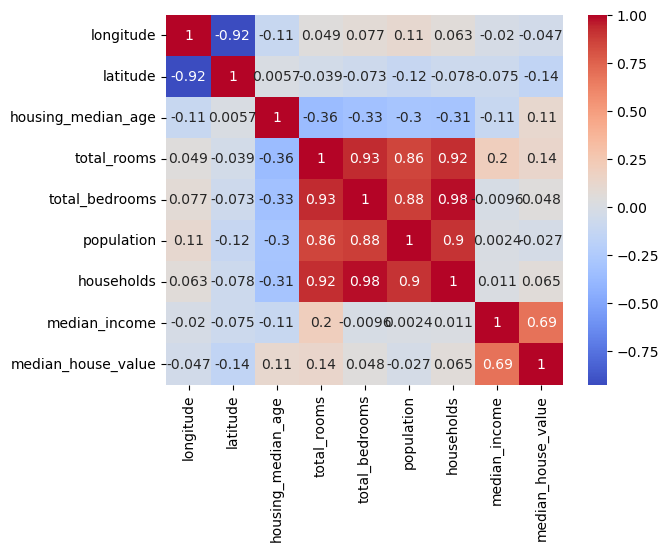

In [28]:
# Create a heatmap using the DataFrame
import seaborn as sns
# create heatmap using Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

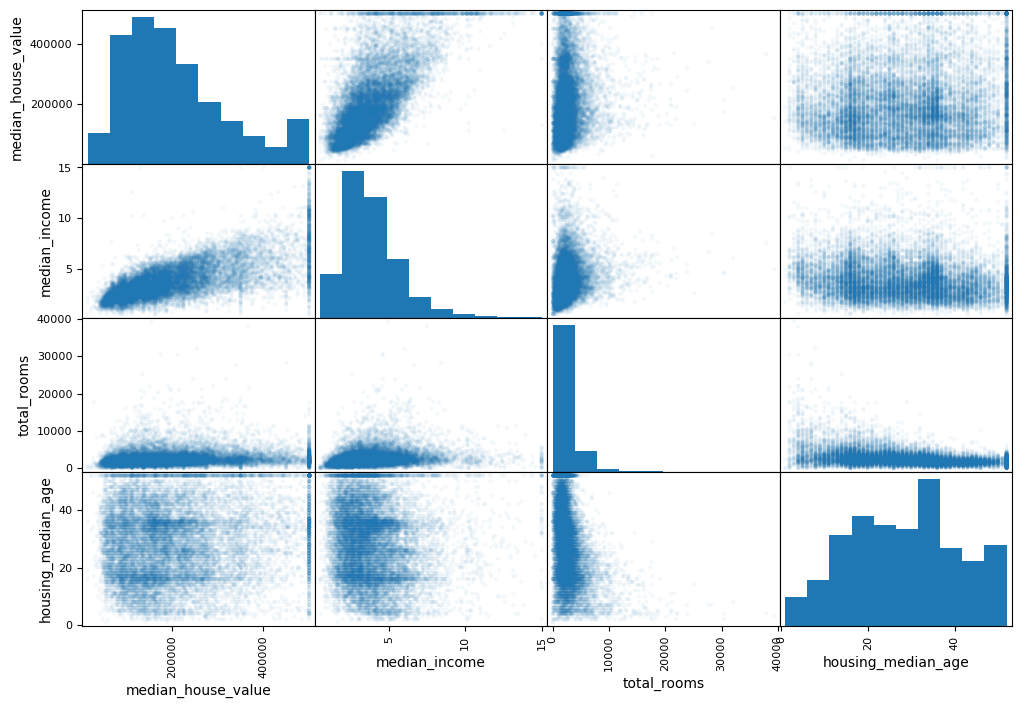

In [29]:
from pandas.plotting import scatter_matrix as ppsm
attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]
ppsm(housing_buc[attributes],figsize=(12,8),alpha=0.05)

<Axes: xlabel='median_income', ylabel='median_house_value'>

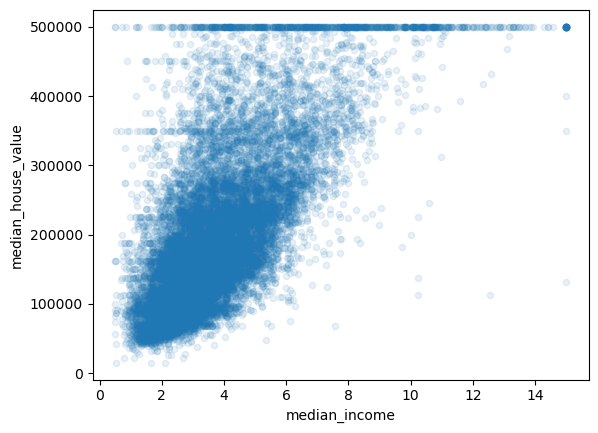

In [30]:
housing_buc.plot(kind="scatter", x="median_income",y="median_house_value",alpha=0.1)

<Axes: xlabel='median_income', ylabel='housing_median_age'>

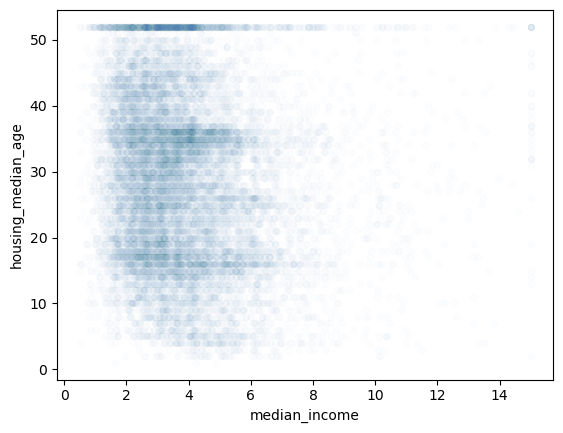

In [31]:
housing_buc.plot(kind="scatter", x="median_income",y="housing_median_age",alpha=0.01)

In [32]:
# Adding some custom properties for more noteworthy metrics
housing_buc["rooms_per_household"]=housing_buc["total_rooms"]/housing_buc["households"]
housing_buc["bedrooms_per_room"]=housing_buc["total_bedrooms"]/housing_buc["total_rooms"]
housing_buc["population_per_household"]=housing_buc["population"]/housing_buc["households"]

In [33]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='rooms_per_household', ylabel='median_house_value'>,
        <Axes: xlabel='bedrooms_per_room', ylabel='median_house_value'>,
        <Axes: xlabel='population_per_household', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='rooms_per_household'>,
        <Axes: xlabel='rooms_per_household', ylabel='rooms_per_household'>,
        <Axes: xlabel='bedrooms_per_room', ylabel='rooms_per_household'>,
        <Axes: xlabel='population_per_household', ylabel='rooms_per_household'>],
       [<Axes: xlabel='median_house_value', ylabel='bedrooms_per_room'>,
        <Axes: xlabel='rooms_per_household', ylabel='bedrooms_per_room'>,
        <Axes: xlabel='bedrooms_per_room', ylabel='bedrooms_per_room'>,
        <Axes: xlabel='population_per_household', ylabel='bedrooms_per_room'>],
       [<Axes: xlabel='median_house_value', ylabel='population_per_household'>,
        <Ax

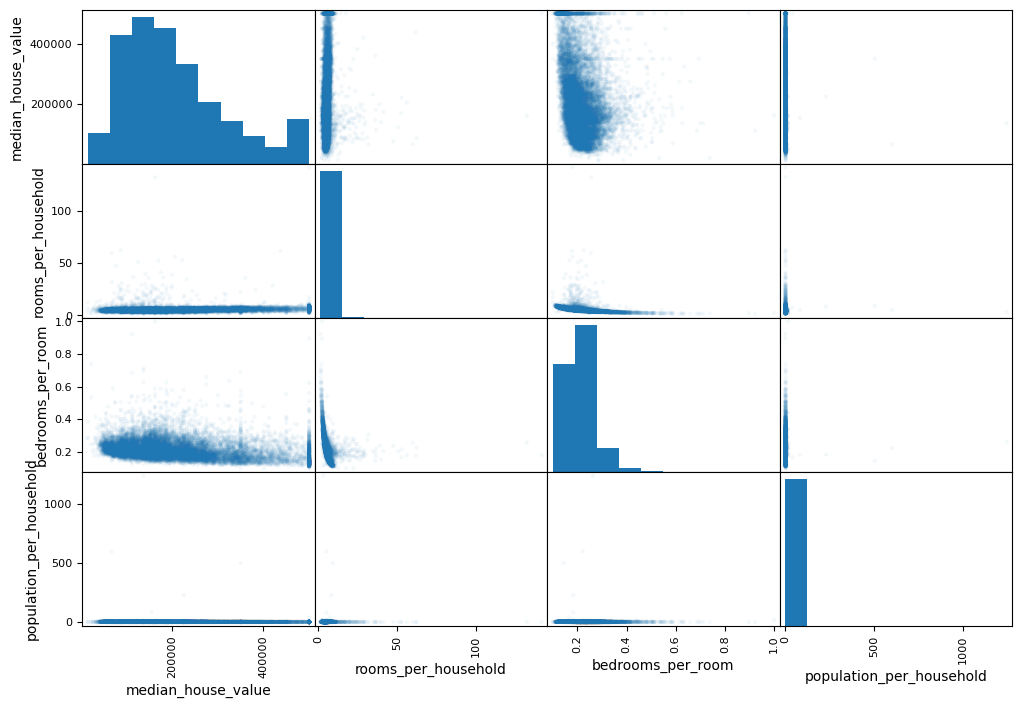

In [34]:
attributes = ["median_house_value","rooms_per_household","bedrooms_per_room","population_per_household"]
ppsm(housing_buc[attributes],figsize=(12,8),alpha=0.05)

In [35]:
# Separating the labels from the train set
housing_buc = strat_train_set.drop("median_house_value",axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [36]:
# We check for data completeness
housing_buc.head()
# return shows that we have 16354 total_bedrooms non-null vs 16512 non-null in the rest of the data 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN


In [37]:
# We decide to fill the missing values with the median of the rest
median_bedrooms = housing_buc["total_bedrooms"].median()
housing_buc["total_bedrooms"].fillna(median_bedrooms,inplace=True)
print(median_bedrooms)
print(housing_buc.info())
housing_num = housing_buc.drop("ocean_proximity",axis=1)

433.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB
None


In [38]:
housing_buc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [39]:
from sklearn.impute import SimpleImputer
housing_num = housing_buc.drop("ocean_proximity",axis=1)
imputer = SimpleImputer(strategy="median")
imputer.fit(housing_num) # Fitting the Imputer instance to the data set
print(housing_num)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   
...          ...       ...                 ...          ...             ...   
15174    -117.07     33.03                14.0       6665.0          1231.0   
12661    -121.42     38.51                15.0       7901.0          1422.0   
19263    -122.72     38.44                48.0        707.0           166.0   
19140    -122.70     38.31                14.0       3155.0           580.0   
19773    -122.14     39.97                27.0       1079.0           222.0   

       population  households  median_income  
1265

In [40]:
# print(imputer.statistics_)
# print(housing_buc.median().values)
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_tr.info()
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 

In [51]:
housing_num.index

Int64Index([12655, 15502,  2908, 14053, 20496,  1481, 18125,  5830, 17989,
             4861,
            ...
            12396, 16476,  2271,  6980,  5206, 15174, 12661, 19263, 19140,
            19773],
           dtype='int64', length=16512)

In [41]:

from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_buc[["ocean_proximity"]])
print(housing_cat_1hot.toarray())


[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [42]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [43]:
"""Definition of Own Transformer"""
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6
class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        rooms_per_household = X[:,rooms_ix]/X[:,households_ix]
        population_per_household = X[:,population_ix]/X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing_buc.values)


In [44]:
# Pipeline for automatic data transformation
# Output is basically all we did before, but faster
# Tranforms all numerical values into the Standard-Derivation form
# Tranforms all categorical values into a OneHot-Matrix
# type(housing_prepared) = numpy.ndarray !
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler",StandardScaler())    
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num",num_pipeline,num_attribs),
    ("cat", OneHotEncoder(),cat_attribs)
])
housing_prepared = full_pipeline.fit_transform(housing_buc)

In [45]:
"""Model Training and Testing on TRAINING DATA"""
"""No1 - Linear Regression"""
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)
some_data = housing_buc.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data) # Applies the "fast tranform" to our data
rndd_prdctn = [round(num, 0) for num in lin_reg.predict(some_data_prepared)]

# For big data sets, we should test our code with a smaller batch of the train data
print("===For 5 Datapoints===")
print("Prediction for 5 data points: ", rndd_prdctn)
print("True Values for 5 data points: ", list(some_labels))
from sklearn.metrics import mean_squared_error as mse
lin_reg_mse = np.sqrt(mse(rndd_prdctn, some_labels))
print("MSE for 5 data points: ", lin_reg_mse)

# Now the whole dataset w/ Linear Regression
full_rndd_prdctn = [round(pred,0) for pred in lin_reg.predict(housing_prepared)]
print("===For the Whole Set===")
print("Prediction for whole set: ", full_rndd_prdctn)
print("True Values for whole set: ", list(housing_labels))
full_lin_reg_mse = np.sqrt(mse(full_rndd_prdctn, housing_labels))
print("MSE for whole set: ", full_lin_reg_mse)
print("===Summary===")
print("Relative difference of mean error and average housing price: ", round((full_lin_reg_mse*100/housing_labels.mean()),1), "%")
# The current error is 33.2 % of the average house price, this is nuts, and too much for a good prediction
# Experts are usually capable of predicting the house price with 20% accuracy, so we should work towards that


===For 5 Datapoints===
Prediction for 5 data points:  [85658.0, 305493.0, 152056.0, 186096.0, 244551.0]
True Values for 5 data points:  [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]
MSE for 5 data points:  47159.23613885195
===For the Whole Set===
Prediction for whole set:  [85658.0, 305493.0, 152056.0, 186096.0, 244551.0, 206382.0, 376422.0, 266570.0, 151002.0, 30119.0, 65612.0, 174910.0, 311474.0, 125055.0, 223407.0, 246006.0, 206817.0, 160449.0, 263040.0, 236226.0, 139891.0, 380617.0, 90079.0, 180362.0, 74640.0, 67444.0, 292359.0, 193694.0, 226518.0, 270834.0, 265291.0, 227612.0, 248245.0, 313288.0, 323034.0, 382339.0, 49515.0, 247137.0, 107072.0, 160906.0, 267715.0, 125883.0, 226836.0, 277907.0, 198578.0, 224635.0, 121004.0, 208485.0, 114484.0, 273029.0, 216817.0, 261595.0, 195379.0, 24764.0, 235167.0, 208828.0, 78515.0, 250564.0, 121233.0, 185088.0, 287436.0, 200170.0, 95154.0, 187521.0, 116583.0, 215062.0, 182424.0, 225106.0, 248580.0, 213120.0, 243884.0, 103510.0, 147098.0, 2

In [46]:
"""No2 - Decision Tree"""
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(housing_prepared,housing_labels)
dtr.predict(housing_prepared)
print("MSE for the DTR model: ",np.sqrt(mse(dtr.predict(housing_prepared),housing_labels)))
# MSE for the DTR model:  0.0
# This is a sign of overfitting hardcore


MSE for the DTR model:  0.0


In [47]:
"""Cross Validation of the DTR Fraud"""
# Scikit cross_val_score separates our (training) data into chunks for in-between fit check
from sklearn.model_selection import cross_val_score as cvs
scores1 = cvs(dtr,housing_prepared,housing_labels,scoring="neg_mean_squared_error", cv=10) 
print(list(int(round(num,0)) for num in np.sqrt(-scores1)))
# [72628, 71478, 68834, 72742, 69408, 76213, 69743, 73693, 68960, 67938]
# As we see, this is even worse than our linear regression

[73068, 70770, 68029, 72162, 70160, 76952, 69504, 73271, 69082, 70589]


In [48]:
"""Cross Validation of the LinReg Century Error"""
scores2 = cvs(lin_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error", cv=10)
print(list(int(round(num,0)) for num in np.sqrt(-scores2)))

[71763, 64115, 67771, 68635, 66846, 72528, 73997, 68802, 66443, 70140]


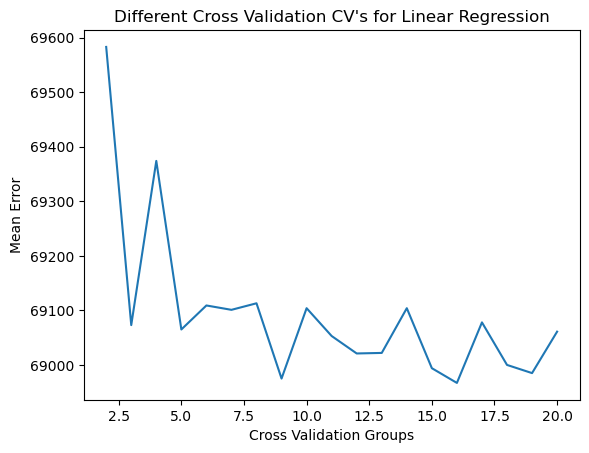

In [49]:
length = 19
test_cvs = np.linspace(2,20,length,dtype=int)
test_scores = np.zeros(length, dtype=int)
for i in test_cvs:
    #print(i)
    test_score = cvs(lin_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error", cv=i)
    test_scores[i-2] = np.mean(np.sqrt(-test_score))
    #print(test_scores)
#print(test_scores)
#print(test_cvs)
#print(type(test_scores))
#print(type(test_cvs))
plt.plot(test_cvs,test_scores)
plt.title("Different Cross Validation CV's for Linear Regression")
plt.ylabel("Mean Error")
plt.xlabel("Cross Validation Groups")
plt.show()


In [50]:
"""No3 - Random Forest Regressor"""
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
# rfr.fit(housing_prepared, housing_labels)
print("Checkpoint: Model fitting done")
# rfr_predict = rfr.predict(housing_prepared)
print("Checkpoint: Predictions done")

print("RFR Predictions :", list(rfr_predict))
print("RFR True Values :", list(housing_labels))
forest_rmse = np.sqrt(mse(rfr_predict,housing_labels))
print("RFR Mean Error :",round(forest_rmse,0))
# 20-30 seconds

print("Cross Validation of Prediction")
# rfr_test_score = cvs(rfr,housing_prepared,housing_labels,scoring="neg_mean_squared_error", cv=10)
print("RFR CV Mean Error :", round(np.mean(np.sqrt(-rfr_test_score)),0)) # round is new
# took over 3 minutes

# The RFR is the best we have even though the error is quite high


Checkpoint: Model fitting done
Checkpoint: Predictions done


NameError: name 'rfr_predict' is not defined

In [ ]:
"""Model Optimization"""
"""Systematic Search For Hyperparameters: Grid Search"""
from sklearn.model_selection import GridSearchCV as GS
param_grid = [
    {"n_estimators":[3,10,30],"max_features":[2,4,6,8]},
    {"bootstrap":[False],"n_estimators":[3,10],"max_features":[2,3,4]}
]

grid_search = GS(rfr,
                 param_grid,
                 cv=5,
                 scoring="neg_mean_squared_error",
                 return_train_score=True
)

grid_search.fit(housing_prepared,housing_labels) # Takes a while
best_parameters = grid_search.best_params_
print("Best Par: ", best_parameters)
best_estimator = grid_search.best_estimator_
print("Best Est: ",best_estimator)

In [ ]:
"""Grid Search Results"""
cvres = grid_search.cv_results_
for mean_score, params in zip (cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

In [ ]:
"""Feature Importance"""
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

In [ ]:
extra_attribs = ["rooms_per_hhld","population_per_hhld","bedrooms_per_room"]
cat_encoder1 = full_pipeline.named_transformers_["cat"]
cat_1hot_attribs = list(cat_encoder1.categories_[0])
attributes1 = num_attribs + extra_attribs + cat_1hot_attribs
sorted(zip(feature_importances,attributes1),reverse=True)

In [ ]:
"""Evaluation on Test Data"""
final_model = grid_search.best_estimator_
print("Model used: ", final_model)

X_test = strat_test_set.drop("median_house_value",axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

y_pred = pd.Series(final_model.predict(X_test_prepared))

final_rmse = np.sqrt(mse(y_test, y_pred))
print("RMSE :",final_rmse)


In [ ]:
from scipy import stats
confidence = 0.95
y_pred1 = y_pred.reset_index(drop=True)
y_test1 = y_test.reset_index(drop=True)
squared_errors = (y_pred1 - y_test1) ** 2
np.sqrt(stats.t.interval(confidence,len(squared_errors)-1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))
# Returns: array([46255.5950543 , 50176.43982874])
"The confidence level specified in the function is 0.95,"
"which means that there is a 95% probability that the true mean squared error falls within the calculated confidence interval."

